# Data on the COVID19 epidemic

This notebook aims at presenting some data resources regarding the COVID19 epidemic. It contains: 

1. The French data from https://github.com/opencovid19-fr/data
2. International globalized data from https://covid.ourworldindata.org/data/ecdc/full_data.csv (data used for the [COVID19 Global Forecasting, Week 4](https://www.kaggle.com/c/covid19-global-forecasting-week-4/))       
3. Detailled international data including some location from https://github.com/beoutbreakprepared/nCoV2019/

Disclaimer: sory, I'm not expert in pandas

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load and clean the French covid 19 data  
The data from https://github.com/opencovid19-fr/data is updated evry day. 

If needed, you can download the file.  
Other source may be considzered such as 
https://www.data.gouv.fr/fr/datasets/cas-confirmes-dinfection-au-covid-19-par-region/

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/opencovid19-fr/data/master/dist/chiffres-cles.csv',error_bad_lines=False)
print('size of the data frame (nb row x nb columns ): ',df.shape)

df["cas_confirmes"].fillna(0,inplace=True)
df["deces"].fillna(0,inplace=True)
df["reanimation"].fillna(0,inplace=True)
df["hospitalises"].fillna(0,inplace=True)
df["gueris"].fillna(0,inplace=True)

df['date'] = pd.to_datetime(df['date'])
df['date'].apply(lambda x:x.toordinal())
df_france = df[df['granularite'].isin(['pays'])]
df_france = df_france[df_france['source_nom'].isin(['Ministère des Solidarités et de la Santé'])]
date = df_france['date'].values
date = (date-date[0])/np.timedelta64(1, 'D')

df_france.tail()

,date,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,deces_ehpad,reanimation,hospitalises,gueris,depistes,source_nom,source_url,source_archive,source_type
6032,2020-04-10,pays,FRA,France,90676.0,NaN,NaN,NaN,8598.0,4599.0,7004.0,31267.0,24932.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
6153,2020-04-11,pays,FRA,France,93790.0,NaN,NaN,NaN,8943.0,4889.0,6883.0,31320.0,26391.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
6274,2020-04-12,pays,FRA,France,95403.0,37188.0,11958.0,25230.0,9253.0,5140.0,6845.0,31826.0,27186.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
6395,2020-04-13,pays,FRA,France,98076.0,38703.0,12481.0,26222.0,9588.0,5379.0,6821.0,32113.0,27718.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
6516,2020-04-14,pays,FRA,France,103573.0,39730.0,13050.0,26680.0,10129.0,5600.0,6730.0,32292.0,28805.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante


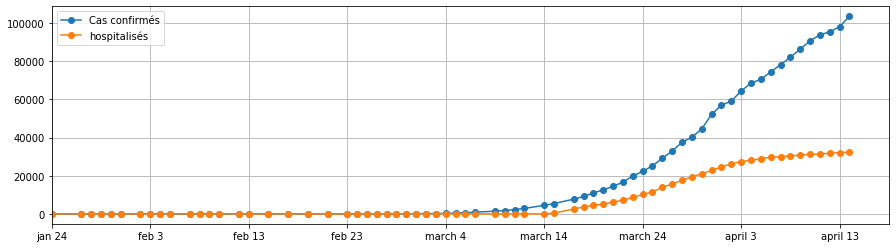

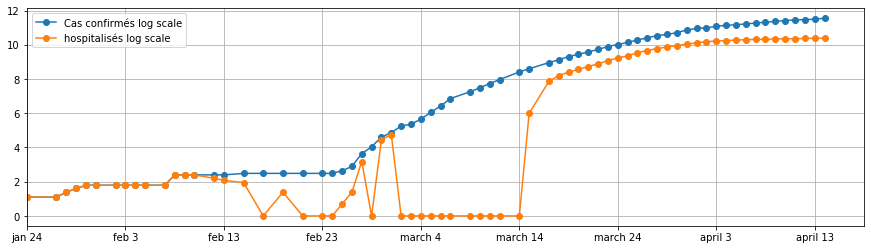

In [42]:
fig, ax = plt.subplots(figsize=(15,4))
plt.plot(date.astype(int),df_france['cas_confirmes'],'o-')
plt.plot(date.astype(int),df_france['hospitalises'],'o-')
plt.grid()
plt.legend(['Cas confirmés','hospitalisés'])
ax.set_xticks([0, 10, 20,30,40, 50, 60, 70, 80, 90])
ax.set_xlim(0, 85)
ax.set_xticklabels(['jan 24','feb 3','feb 13','feb 23','march 4','march 14','march 24','april 3','april 13','april 23'])

fig, ax = plt.subplots(figsize=(15,4))
plt.plot(date.astype(int),np.log(df_france['cas_confirmes']),'o-')
plt.plot(date.astype(int),np.log(np.maximum(df_france['hospitalises'],1)),'o-')
plt.grid()
plt.legend(['Cas confirmés log scale','hospitalisés log scale'])
ax.set_xticks([0, 10, 20,30,40, 50, 60, 70, 80, 90])
ax.set_ylim(0, 12)
ax.set_xlim(0, 85)
ax.set_xticklabels(['jan 24','feb 3','feb 13','feb 23','march 4','march 14','march 24','april 3','april 13','april 23'])
plt.show()

## 2. Load the agregated covid 19 data from all over the world

This part of the notbook aims at prodiding a first look at the international data on the COVID19 epidemic. It takes the data from https://covid.ourworldindata.org/data/ecdc/full_data.csv. Here is a nice Kaggle notebook dealing with this data https://www.kaggle.com/ranjithks/ran-covid-19-week4-ma

In [61]:
df_w=pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv',error_bad_lines=False)
countries = df_w['location'].unique()
print('size of the data frame (nb row x nb columns ): ',df_w.shape)
df_w.tail()

size of the data frame (nb row x nb columns ):  (10848, 6)


,date,location,new_cases,new_deaths,total_cases,total_deaths
10843,2020-04-10,Zimbabwe,0,1,11,3
10844,2020-04-11,Zimbabwe,0,0,11,3
10845,2020-04-12,Zimbabwe,3,0,14,3
10846,2020-04-13,Zimbabwe,0,0,14,3
10847,2020-04-14,Zimbabwe,3,0,17,3


In [44]:
c = 'France'

df_c = df_w[df_w['location'].isin([c])]
cas = df_c['total_cases'].values
cas = cas[42:].astype('float64')

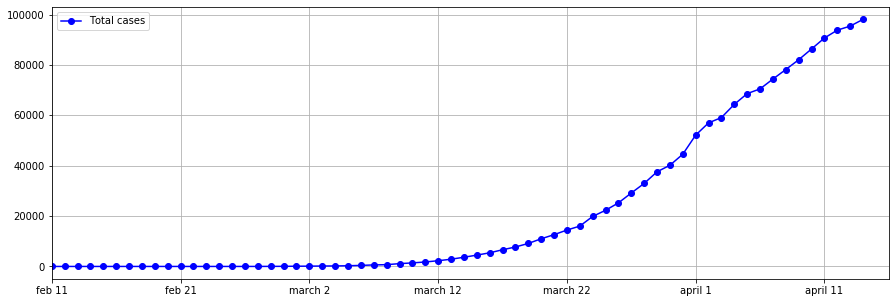

In [45]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(cas,'ob-')
plt.grid()
plt.legend(['Total cases'])
ax.set_xlim(0, 65)
ax.set_xticks([0, 10, 20,30,40, 50,60])
ax.set_xticklabels(['feb 11','feb 21','march 2','march 12','march 22','april 1','april 11'])
plt.show()

## 3. Load detailed data from all over the world

This part of the notbook aims at prodiding a first look at the detailed international data on the COVID19 epidemic. It takes the data from https://github.com/beoutbreakprepared/nCoV2019/, with data agregated from https://github.com/beoutbreakprepared/COVID-19-data-mapping-pipeline.

In [50]:
df_All=pd.read_csv('https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/latest_data/latestdata.csv',error_bad_lines=False,low_memory=False)

In [62]:
print('size of the data frame (nb row x nb columns ): ',df_All.shape)
df_All.head()

size of the data frame (nb row x nb columns ):  (267492, 33)


,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,60-69,female,Whatcom County,Washington,United States,48.826129,-121.719290,admin2,NaN,...,NaN,NaN,NaN,NaN,Whatcom County,Washington,United States,2994.0,NaN,NaN
1,000-1-1,30,male,"Chaohu City, Hefei City",Anhui,China,31.646960,117.716600,admin3,18.01.2020,...,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181.0,NaN,NaN
2,000-1-10,30,male,Hefei City,Anhui,China,31.794440,117.342800,admin2,17.01.2020,...,NaN,NaN,NaN,NaN,Hefei City,Anhui,China,340100.0,NaN,NaN
3,000-1-10,60-69,female,Pitkin County,Colorado,United States,39.217302,-106.915280,admin2,NaN,...,NaN,NaN,NaN,NaN,Pitkin County,Colorado,United States,291.0,NaN,NaN
4,000-1-100,44,male,NaN,Zurich,Switzerland,47.417813,8.655968,admin1,NaN,...,NaN,NaN,NaN,NaN,NaN,Zurich,Switzerland,26.0,NaN,NaN


In [59]:
df_france = df_All[df_All['country'].isin(['France'])]
print('size of the data frame (nb row x nb columns ): ',df_france.shape)
df_france.head()

size of the data frame (nb row x nb columns ):  (10104, 33)


,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
2475,000-1-12045,9,male,Grenoble,Auvergne-Rhone-Alpes,France,45.458391,4.015407,point,NaN,...,18.02.2020,https://www.preprints.org/manuscript/202002.03...,Grenoble,NaN,Isere,Auvergne-Rhone-Alpes,France,8.0,NaN,NaN
2476,000-1-12046,NaN,male,Grenoble,Auvergne-Rhone-Alpes,France,45.458391,4.015407,point,NaN,...,18.02.2020,https://www.preprints.org/manuscript/202002.03...,Grenoble,NaN,Isere,Auvergne-Rhone-Alpes,France,8.0,NaN,NaN
2479,000-1-12047,30,female,Paris,Ile-de-France,France,48.856660,2.342325,admin2,23.01.2020,...,12.02.2020,NaN,NaN,NaN,Paris,Ile-de-France,France,50.0,NaN,NaN
2480,000-1-12048,31,male,Paris,Ile-de-France,France,48.856660,2.342325,admin2,19.01.2020,...,12.02.2020,NaN,NaN,NaN,Paris,Ile-de-France,France,50.0,NaN,NaN
4192,000-1-13452,60,male,Paris,Ile-de-France,France,48.856660,2.342325,admin2,NaN,...,26.02.2020,NaN,NaN,NaN,Paris,Ile-de-France,France,50.0,NaN,NaN
